In [ ]:
#IMPORT FILES FROM DRIVE INTO GOOGLE-COLAB:

#STEP-1: Import Libraries

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from sklearn.metrics import auc
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#STEP-3: Get File from Drive using file-ID

#STEP-3: Get File from Drive using file-ID
#https://drive.google.com/file/d/1bjXXLoFetcMnVMX3VK94C4Ejz_FPY6UA/view?usp=sharing
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1bjXXLoFetcMnVMX3VK94C4Ejz_FPY6UA'}) # replace the id with id of file you want to access
downloaded.GetContentFile('CellDNAWithHeaders.csv') 

#2.1 Get the file
#downloaded = drive.CreateFile({'id':'1SOcTxkqcyCxw-SX-stSnRk86DB1SUytw'}) # replace the id with id of file you want to access
#downloaded.GetContentFile('CellDNA.csv') 



#accuracy on the test dataset
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_test, y_pred)
#print(cm)



In [ ]:
pip install category_encoders

     |████████████████████████████████| 102kB 2.3MB/s 


Using TensorFlow backend.


['Col 1', 'Col 2', 'Col 3', 'Col 4', 'Col 5', 'Col 6', 'Col 7', 'Col 8', 'Col 9', 'Col 10', 'Col 11', 'Col 12', 'Col 13', 'Col 14']
['Col 1', 'Col 2', 'Col 3', 'Col 4', 'Col 5', 'Col 6', 'Col 7', 'Col 8', 'Col 9', 'Col 10', 'Col 11', 'Col 12', 'Col 13', 'Col 14_0', 'Col 14_1', 'Col 14_2', 'Col 14_3', 'Col 14_4', 'Col 14_5', 'Col 14_6', 'Col 14_7', 'Col 14_8', 'Col 14_9', 'Col 14_10']
[222.0, 31.18918919, 40.34234234, 35.57908668, 8.883916969, 0.968324558, -80.11367302, 222.0, 1.0, 16.81247093, 0.8161764709999999, 0.578125, 78.59100000000001]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11
Epoch 1/70
851/851 [==============================] - 0s 499us/step - loss: 0.6520 - acc: 0.9666 - precision: 0.8313 - recall: 0.8395
Epoch 2/70
851/851 [==============================] - 0s 117us/step - loss: 0.3192 - acc: 0.9705 - precision: 0.8395 - recall: 0.8395
Epoch 3/70
851/851 [==============================] - 0s 116us/step - loss: 0.1360 - acc: 0.9705 - precision: 0.8291 - recall: 0.8291
Epoch 4/70
85

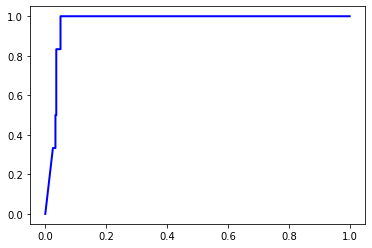

In [ ]:
from numpy import loadtxt
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve ,auc
import category_encoders as ce
import numpy as np
 

df = pd.read_csv("CellDNAWithHeaders.csv")
print(list(df.columns.values))

#create dummy variables for the last column
df = pd.get_dummies(df,columns=["Col 14"])
print(list(df.columns.values))

# creating input features and target variables
X = df.iloc[:,:13].values
y = df.iloc[:,13:24].values
print(list(X[0]))
print(list(y[0]))
n_classes  = y.shape[1]

print(n_classes)
#Splitting the dataset into X_train,X_test,y_train,y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#Splitting the dataset into X_train,X_test,y_train,y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(9, activation='relu', kernel_initializer='random_normal', input_dim=13))
#Second  Hidden Layer
classifier.add(Dense(7, activation='relu', kernel_initializer='random_normal'))
#third  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(11, activation='sigmoid', kernel_initializer='random_normal'))


from keras import backend as K
#calculating recall
def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall
#calculating precision
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

# compiling  the neural network
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',precision, recall])

#Fitting the data to the training dataset
y_score = classifier.fit(X_train,y_train, batch_size=10, epochs=70)

y_pred = classifier.predict(X_test)

print(y_score.history)
classifier.summary()

#compute ROC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
  print(y_test[:,i].shape)
  print(np.array(y_pred).shape)

  fpr[i], tpr[i] , _ =  roc_curve(y_test[:,i], y_pred[:,i])
  roc_auc[i] = auc(fpr[i], tpr[i])
  

#plot the graph
plt.figure()
plt.plot(fpr[2],tpr[2], color='blue',lw=2, label='ROC curve (area = %.2f)' % roc_auc[2])

#eval_model=classifier.evaluate(X_train, y_train)
#eval_model
#predict the output for our test dataset
#y_pred=classifier.predict(X_test)